# Servo Prediction Using Linear Regression

*****

## Objective 
We aim to build a 'Servo' (also known as Servomechanism) prediction model is to predict Class of a vehicle based on its Motor, Screw, Pgain & Vgain. 

## Data Source 
The dataset we used is available on GitHub (link: 'https://github.com/YBI-Foundation/Dataset/blob/main/Servo%20Mechanism.csv')
For in-depth information about the available libraries, modules and functions, we used Pandas, Numpy, Matplotlib and Seaborn official website where they have provided free information about all libraries that can be used to bring the desirable outcome for our Machine Learning Model.

## Import Library 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset 

In [3]:
sp=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

## Describe Dataset 

In [4]:
sp.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
sp.tail(10)

,Motor,Screw,Pgain,Vgain,Class
157,A,B,3,1,45
158,D,B,4,3,13
159,A,A,5,4,20
160,D,A,3,2,39
161,C,E,6,5,9
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44
166,A,A,6,5,20


In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [8]:
sp.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [9]:
sp.shape

(167, 5)

In [10]:
sp.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [11]:
#Categories and Count of Categorical variable of 'Motor'
sp[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [12]:
#Categories and Count of Categorical variable of 'Screw'
sp[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

## Data Visualization 

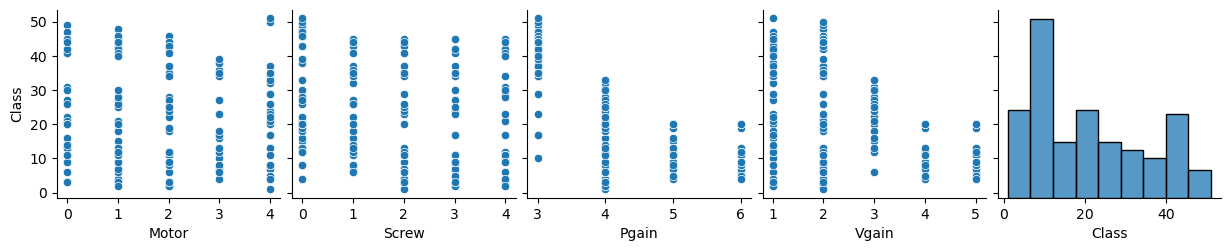

In [15]:
sns.pairplot(sp, x_vars = ['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], y_vars = ['Class'])

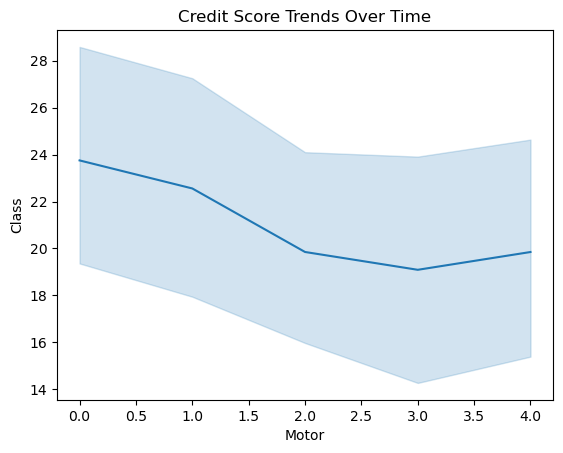

In [76]:
sns.lineplot(x='Motor', y='Class', data=sp)
plt.title('Motor vs Class')
plt.show()

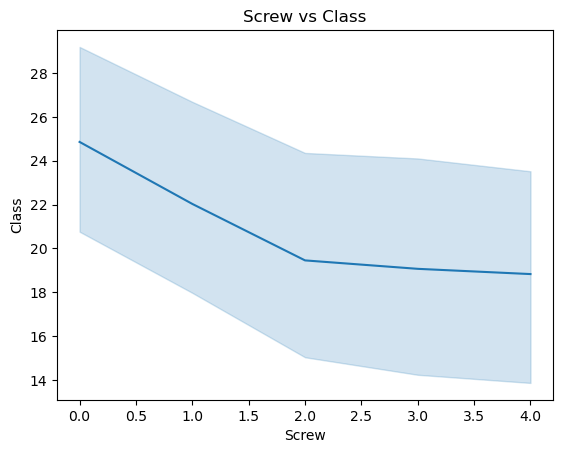

In [78]:
sns.lineplot(x='Screw', y='Class', data=sp)
plt.title('Screw vs Class')
plt.show()

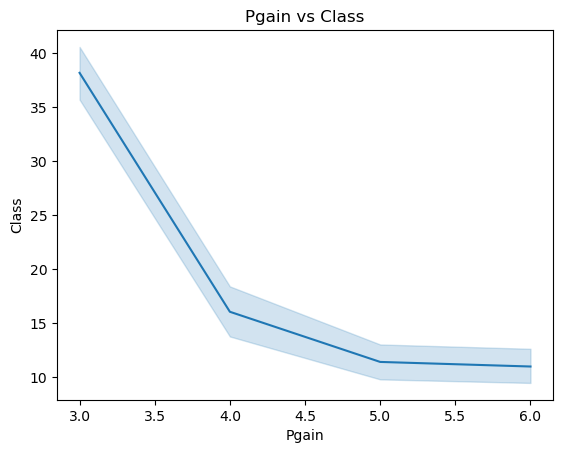

In [79]:
sns.lineplot(x='Pgain', y='Class', data=sp)
plt.title('Pgain vs Class')
plt.show()

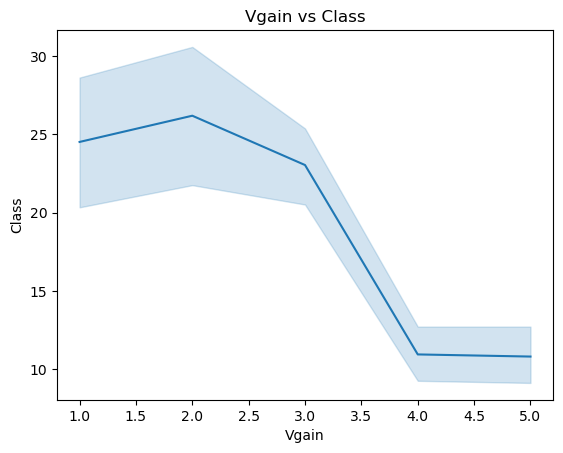

In [80]:
sns.lineplot(x='Vgain', y='Class', data=sp)
plt.title('Vgain vs Class')
plt.show()

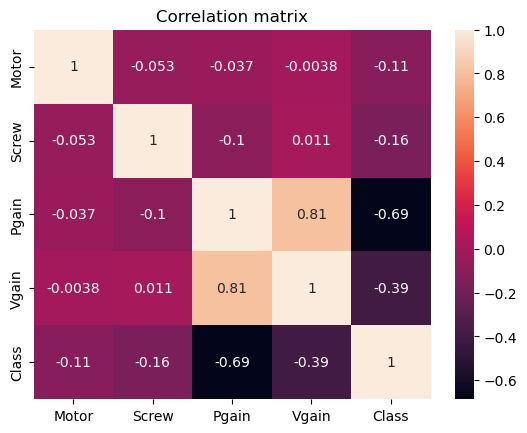

In [64]:
sns.heatmap(sp.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

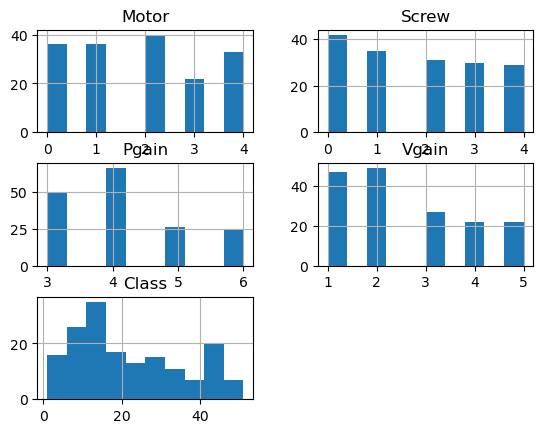

In [65]:
sp.hist()
plt.show()

In [33]:
sp.corr().style.background_gradient(cmap='coolwarm')

,Motor,Screw,Pgain,Vgain,Class
Motor,1.000000,-0.052501,-0.037214,-0.003801,-0.112938
Screw,-0.052501,1.000000,-0.099503,0.011336,-0.162240
Pgain,-0.037214,-0.099503,1.000000,0.812268,-0.687098
Vgain,-0.003801,0.011336,0.812268,1.000000,-0.391963
Class,-0.112938,-0.162240,-0.687098,-0.391963,1.000000


## Data Preprocessing 

### Data Encoding 

In [13]:
sp.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
sp.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [18]:
sp.corr()

,Motor,Screw,Pgain,Vgain,Class
Motor,1.000000,-0.052501,-0.037214,-0.003801,-0.112938
Screw,-0.052501,1.000000,-0.099503,0.011336,-0.162240
Pgain,-0.037214,-0.099503,1.000000,0.812268,-0.687098
Vgain,-0.003801,0.011336,0.812268,1.000000,-0.391963
Class,-0.112938,-0.162240,-0.687098,-0.391963,1.000000


In [19]:
sp=sp.dropna()

In [20]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Motor   167 non-null    int64
 1   Screw   167 non-null    int64
 2   Pgain   167 non-null    int64
 3   Vgain   167 non-null    int64
 4   Class   167 non-null    int64
dtypes: int64(5)
memory usage: 6.6 KB


## Define Target Variable (y) and Feature variable (x)

In [21]:
sns.regplot(x = 'Pgain' , y = 'Class' , data = sp)

<AxesSubplot:xlabel='Pgain', ylabel='Class'>

In [22]:
y=sp['Class']
x=sp[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [23]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [24]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [25]:
y.shape,x.shape

((167,), (167, 4))

## Train Test split 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

## Modeling 

### Selecting the model

#### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [43]:
model1.fit(x_train,y_train)

LinearRegression()

## Prediction 

In [48]:
y_pred=model1.predict(x_test)

In [49]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## Model Evaluation
Accuracy

In [52]:
from sklearn.metrics import classification_report,mean_absolute_percentage_error,r2_score,mean_sqaured_error
error=mean_absolute_percentage_error(y_test,y_pred)
error

0.8268204638174635

In [72]:
r2_score(y_test,y_pred)

0.6807245170563925

In [51]:
accuracy=100-(error*100)
print("The accuracy of the model created (Linear Regression)=",accuracy)

The accuracy of the model created (Linear Regression)= 17.31795361825364


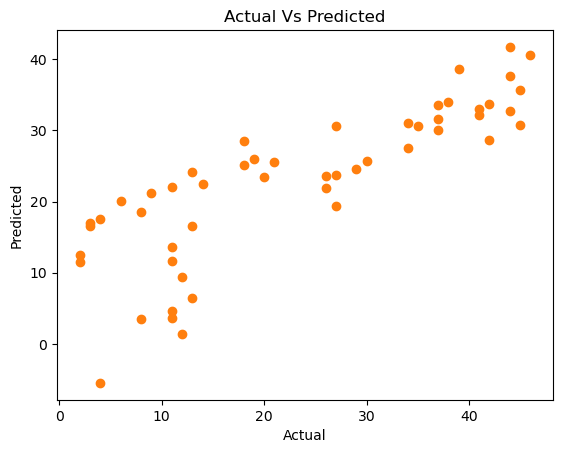

In [74]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.show()

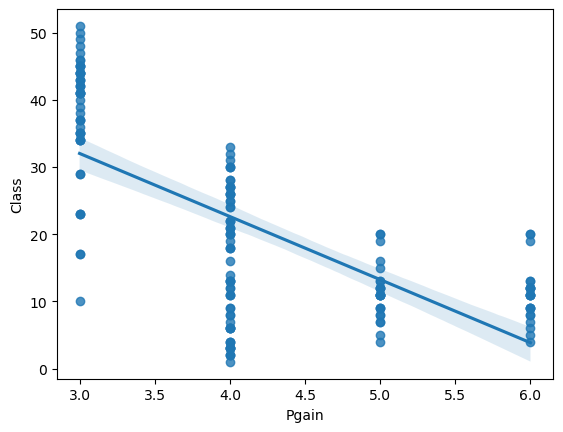

In [62]:
sns.regplot(x = 'Pgain' , y = 'Class' , data = sp)
plt.show()

## Explaination
The Servo Prediction model is a control system that accurately positions or controls the motion of a mechanical device, such as a motor or actuator. It uses feedback to maintain a desired position or trajectory.
Building an accurate servo prediction model may involve an iterative process of collecting data, training the model, and evaluating its performance to refine and improve it.

